<h2>Useamman selittäjän lineaarinen regressio</h2>

Koneoppimisen mallit löytyvät sklearn-kirjastosta (scikit-learn). Lue lisää https://scikit-learn.org/stable/

In [1]:
# Tuon kirjastot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Avaan datan (kesämökkien hintoja tuhansina euroina)
df = pd.read_excel('http://taanila.fi/mokki.xlsx')
df

,nro,ranta,pinta-ala,sähkö,hinta
0,1,30,50,0,95
1,2,35,42,0,95
2,3,40,25,1,80
3,4,50,30,1,100
4,5,55,45,0,135
5,6,60,24,1,100
6,7,60,60,1,210
7,8,70,34,1,160
8,9,80,32,0,150
9,10,85,28,0,150


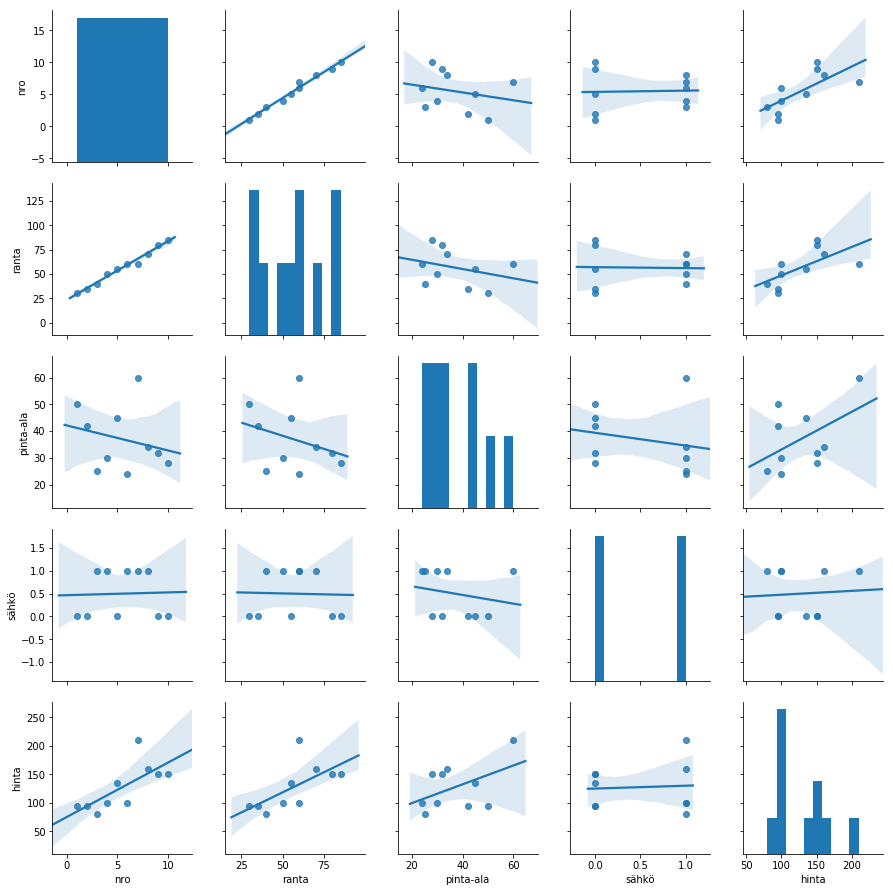

In [3]:
# Riippuvuuksien tarkastelua seaborn-kirjaston hajontakaavioina
sns.pairplot(df, kind='reg')

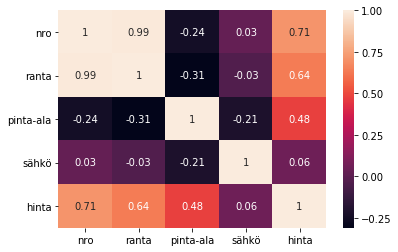

In [4]:
# Riippuvuuksien tarkastelua korrelaatiokertoimien avulla
correlation_matrix = df.corr().round(2)

# Korrelaatioiden taustaväri seaborn-kirjaston heatmap-funktiolla
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
# Datan valmistelu

X = df[['ranta', 'pinta-ala', 'sähkö']] # feature-matriisi X
y = df['hinta'] # target eli selitettävä/ennustettava muuttuja

In [6]:
# Tuon lineaarisen regressiomallin
from sklearn.linear_model import LinearRegression

# Sovitan mallin dataan
malli = LinearRegression().fit(X,y)

In [7]:
malli.coef_ # regressiosuoran kulmakerroin

array([ 1.9750098 ,  2.77578415, 20.29877373])

In [8]:
malli.intercept_ # regressiosuoran vakiotermi

-96.94145434036429

In [9]:
malli.score(X,y) # selityskerroin

0.9819136190845801

Text(0, 0.5, 'Poikkeama todellisesta')

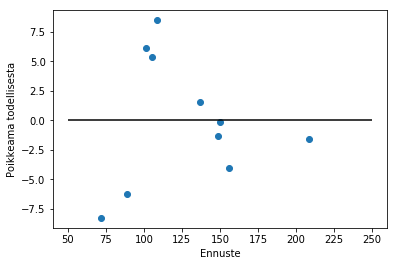

In [10]:
# Mallin virhetermit pistekaaviona
plt.scatter(malli.predict(X), malli.predict(X)-y)

# Vaakaviiva nollapoikkeaman kohdalle
plt.hlines(y=0,xmin=50,xmax=250)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

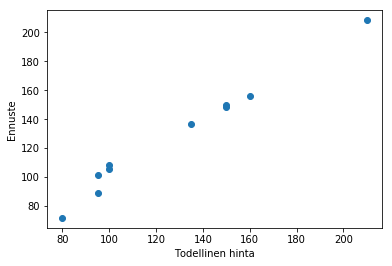

In [11]:
# Todellisen hinnan ja mallin antamien ennusteiden vastaavuus pistekaaviona
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen hinta')
plt.ylabel('Ennuste')

In [12]:
# Hintaennusteet uudelle datalle

Xuudet = pd.read_excel('http://taanila.fi/mokkinew.xlsx')

Xuudet['Hintaennuste'] = malli.predict(Xuudet)
Xuudet

,ranta,pinta-ala,sähkö,Hintaennuste
0,100,90,1,370.678873
1,60,56,1,197.301820
2,30,25,0,31.703444
3,50,30,0,85.082560


In [13]:
# Perinteisempi regressio-statistiikka statsmodels-kirjastosta

import statsmodels.api as sm

# Seuraava rivi tarvitaan, jotta malliin lasketaan vakiotermi
X = sm.add_constant(X)

# Mallin sovitus (OLS = Ordinary Least Squares)
malli_sm = sm.OLS(y, X).fit()

print(malli_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  hinta   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.29e-05
Time:                        10:11:08   Log-Likelihood:                -30.630
No. Observations:                  10   AIC:                             69.26
Df Residuals:                       6   BIC:                             70.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -96.9415     12.767     -7.593      0.0

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
